In [1]:
import pandas as pd


In [2]:
## read in file
df = pd.read_csv("US_AQI.csv")
df.head()

,Unnamed: 0,CBSA Code,Date,AQI,Category,Defining Parameter,Number of Sites Reporting,city_ascii,state_id,state_name,lat,lng,population,density,timezone
0,0,10140,2022-01-01,21,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
1,1,10140,2022-01-02,12,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
2,2,10140,2022-01-03,18,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
3,3,10140,2022-01-04,19,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles
4,4,10140,2022-01-05,17,Good,PM2.5,2,Aberdeen,WA,Washington,46.9757,-123.8094,16571.0,588.0,America/Los_Angeles


In [3]:
# get number of rows
df.shape
rows = df.shape[0]

In [4]:
# rather than go through each row, only work with the two columns we care about
dates = df['Date'].tolist()
Aqis = df["AQI"].tolist()


In [5]:
numbers = []  # year labels
years = []    # data for each year
minimum = 1980
maximum = 2020

# fill out year labels and create an empty list for each in the years list
for i in range(maximum - minimum + 1):
    numbers.append(minimum + i)
    years.append([])

In [6]:
high_rows = []  ## used to investigate which rows have extremely high AQI
floor = 250

print("analyzing", rows, "rows.")
for i in range(rows):
    num = int(dates[i][:4])   # get current year number for the row
    
    if num <= maximum:      # if the year is within the range, add it's data to the corresponding year list
        years[num - minimum].append(Aqis[i])
    
        if Aqis[i] >= floor: # if the Aqi is above a certain threshold, add the row to the high list to investigate laster
            high_rows.append(i)
    
print("complete")

analyzing 5617325 rows.
complete


In [7]:
# averaging function that removes entries that are impossible
def average(lst):
    new_lst = []
    limit = 500
    for x in lst:
        if x <= limit:
            new_lst.append(x)
    return sum(new_lst)/len(new_lst)

In [8]:
# create lists for means, maxes, and minimums
means = [average(year) for year in years]
maxes = [max(year) for year in years]
mins = [min(year) for year in years]

In [9]:
means

[57.26556373479042,
 53.84382417742937,
 52.76944349690561,
 55.72970585744189,
 53.276649274356465,
 52.58481778460652,
 51.7139068399231,
 53.92406876790831,
 55.21235667184678,
 48.50247088607595,
 47.38808011905092,
 47.356687615788964,
 43.184886286490155,
 44.493440137130804,
 45.85860620360246,
 46.18916444604293,
 45.062425727562555,
 45.18386837689757,
 49.156087607995666,
 53.08244006868745,
 50.235159197439124,
 50.19292089404226,
 50.58334469965628,
 48.363788824496034,
 45.39350951555382,
 48.60639192598823,
 47.407436637211646,
 48.81188324308006,
 46.035921299188004,
 42.90356895844682,
 45.44484528256051,
 45.82776563763899,
 46.1966086741076,
 43.25052064414578,
 42.64628089173901,
 41.94720886535679,
 40.93842802338873,
 42.132537478200106,
 41.89505126484679,
 40.12135180320038,
 40.0657207766129]

# Graphing the preliminary results

In [10]:
import matplotlib.pyplot as plt

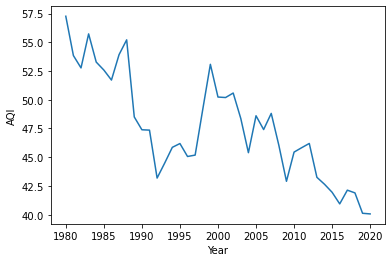

In [11]:
plt.plot(numbers, means)
plt.ylabel('AQI')
plt.xlabel("Year")
plt.show()

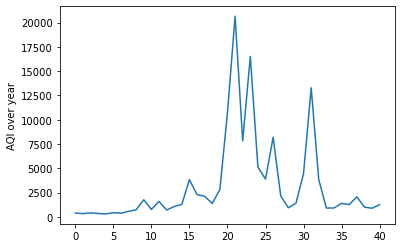

In [12]:
plt.plot(maxes)
plt.ylabel('AQI over year')
plt.show()

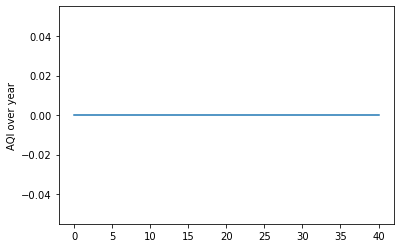

In [13]:
plt.plot(mins)
plt.ylabel('AQI over year')
plt.show()

In [14]:
max(years[-1])

1250

In [15]:
#sorted(years[-1], reverse = True)

In [16]:
len(high_rows)

2751

In [17]:
for i in high_rows[:10]:
    print(df.iloc[i])
    print("Break \n\n")

Unnamed: 0                                197821
CBSA Code                                  10540
Date                                  2020-09-08
AQI                                          502
Category                               Hazardous
Defining Parameter                         PM2.5
Number of Sites Reporting                      3
city_ascii                                Albany
state_id                                      OR
state_name                                Oregon
lat                                      44.6272
lng                                    -123.0965
population                               66405.0
density                                   1190.0
timezone                     America/Los_Angeles
Name: 194594, dtype: object
Break 


Unnamed: 0                                197822
CBSA Code                                  10540
Date                                  2020-09-09
AQI                                          487
Category                        

In [18]:
ouput = pd.DataFrame({"year": numbers, "Average AQI": means})

In [19]:
ouput

,year,Average AQI
0,1980,57.265564
1,1981,53.843824
2,1982,52.769443
3,1983,55.729706
4,1984,53.276649
5,1985,52.584818
6,1986,51.713907
7,1987,53.924069
8,1988,55.212357
9,1989,48.502471


## Code to export a csv small enough for github

In [20]:
df2 = df.drop(["state_id", "city_ascii", "Number of Sites Reporting", "Unnamed: 0", "CBSA Code", "lat", "lng", "timezone", "state_name", "density", "Category", "Defining Parameter", "population"], axis = 1)
df2['Date'] = df2['Date'].str[:4]
df2.head()

,Date,AQI
0,2022,21
1,2022,12
2,2022,18
3,2022,19
4,2022,17


In [21]:
df2.to_csv("trimmed_AQI_for_github.csv")